In [1]:
from scipy import misc
from PIL import Image
from skimage import exposure
from sklearn import svm

import scipy
from math import sqrt,pi
from numpy import exp
from matplotlib import pyplot as plt
import numpy as np
import glob
import matplotlib.pyplot as pltss
import cv2 as cv
from matplotlib import cm
import pandas as pd
from math import pi, sqrt
import pywt
import os

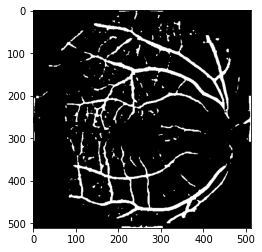

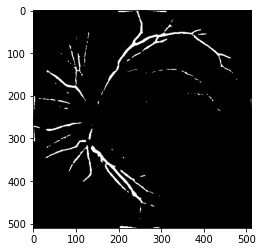

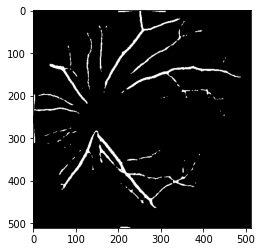

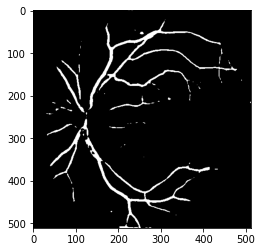

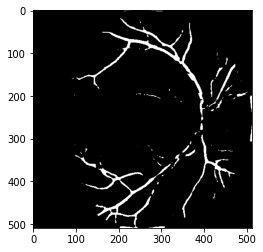

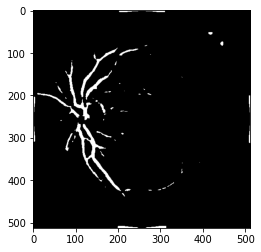

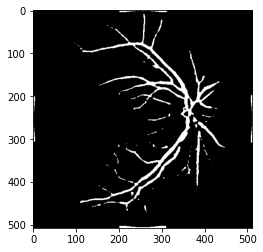

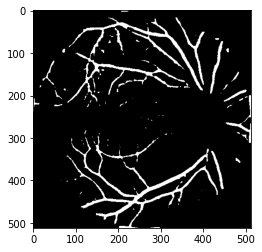

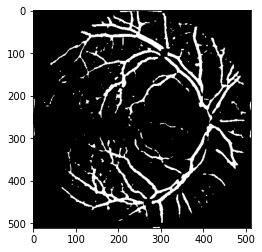

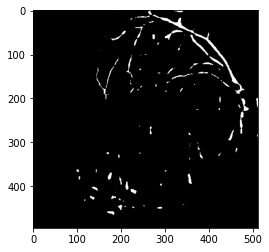

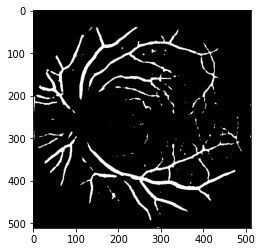

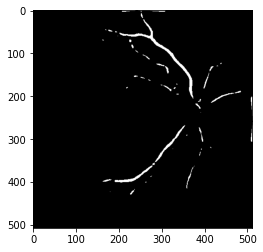

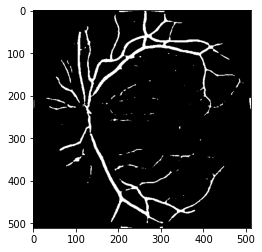

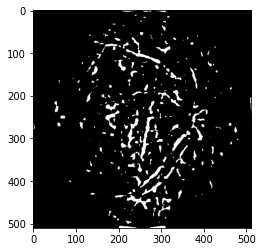

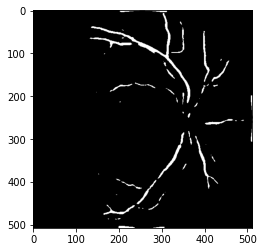

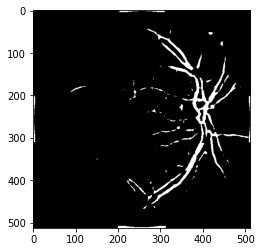

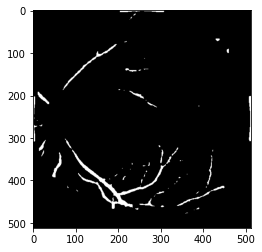

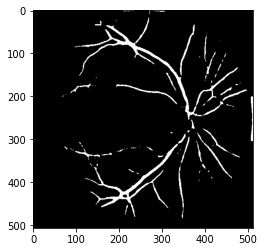

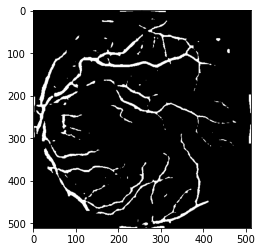

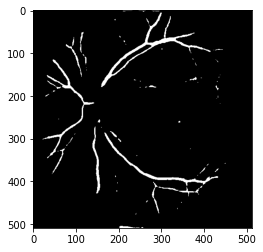

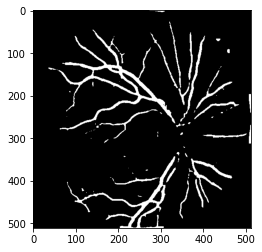

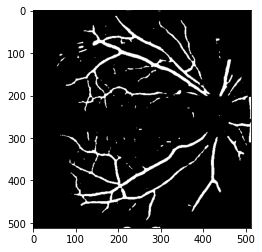

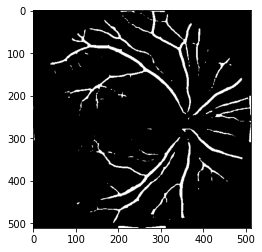

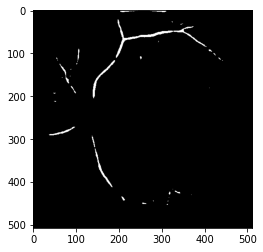

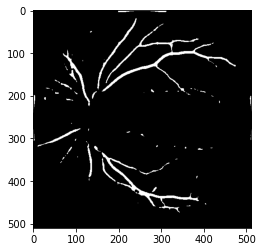

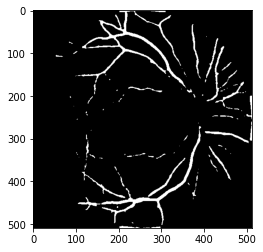

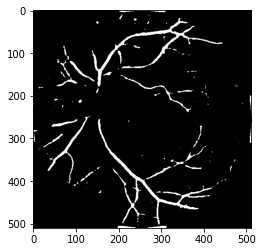

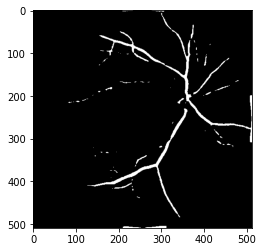

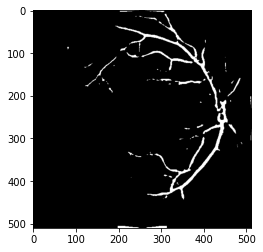

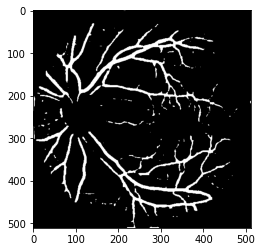

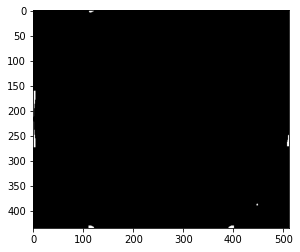

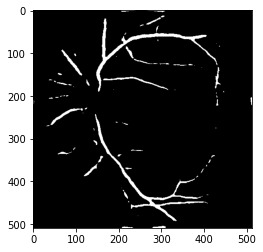

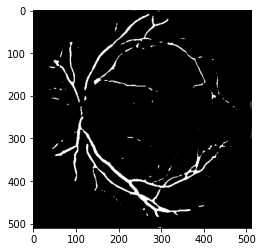

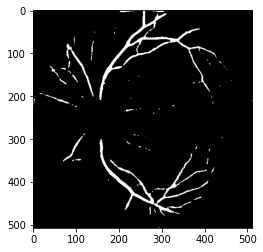

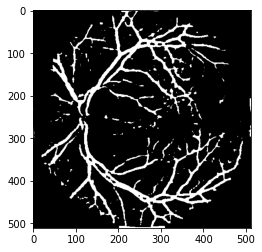

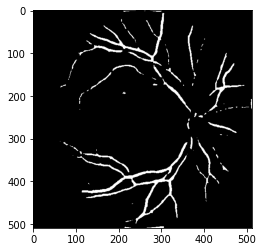

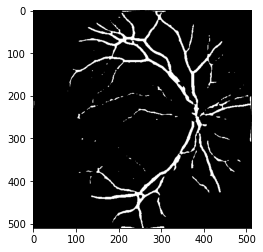

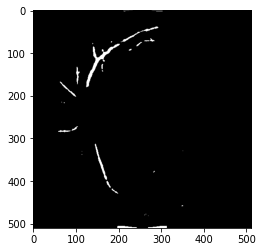

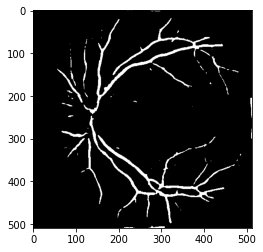

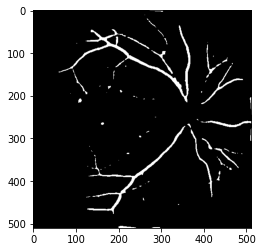

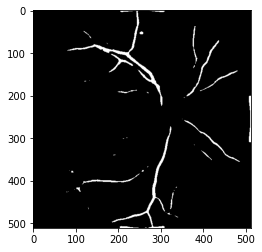

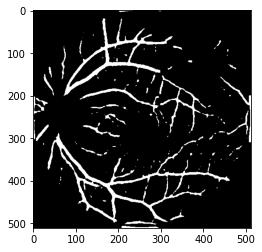

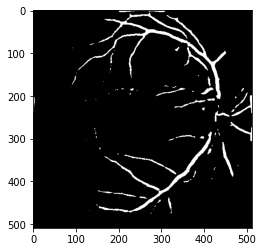

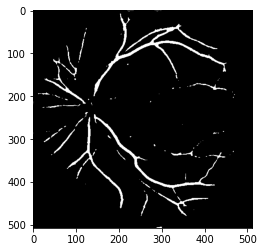

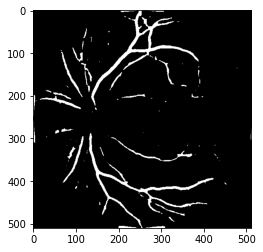

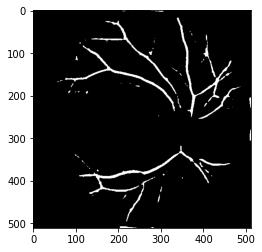

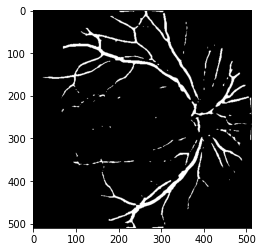

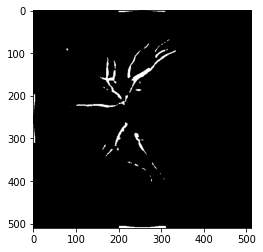

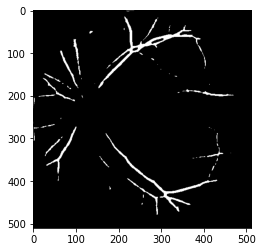

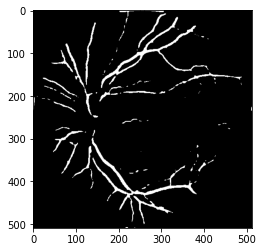

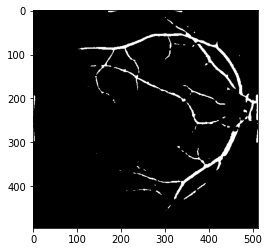

In [4]:
########################### Algorithme appliquer sur un fichier des images ##################################

images_path='/home/chakour/Bureau/Code Mehdi/reseau_vasculaire/'

for images_name in os.listdir(images_path):    # une boucle pour parcourir tous les images existé dans path
    image = os.path.join(images_path,images_name)
    
    image = cv.imread(image) # lire l'image couleur
    img_gray =  cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    ######################### 1 - Segmentation de l'Arbre vasculaire ##################################
    
    #augmentation de contrast
    blue, green, red = cv.split(image) # séparer les 3 plan de couleur
    equalized=cv.equalizeHist(green) # augmenter le contraste par egalisation adaptive d'istogramme
    
    #Filtrage de résultat 
    kernal = np.ones((5,5), np.uint8) #creation d'une matrice 5*5 
    opening = cv.morphologyEx(equalized, cv.MORPH_OPEN, kernal)
    gblur = cv.GaussianBlur(opening,(5, 5), 0)  # filtre de gausse appliquer sur canal vert amélioré
    gblur = cv.cvtColor(gblur, cv.COLOR_BGR2RGB)   # convert the result to RGB
        
    ################ Extraction du réseau vasculaire ( chapeau haut de forme TOPHAT) ########################
    
    # Getting the kernel to be used in Top-Hat 
    filterSize =(11,11) # définir la taille du filtre à utiliser dans TOP-HAT
    kernal2 = cv.getStructuringElement(cv.MORPH_RECT,filterSize) # element structurant est un rectangle
    
    th = cv.morphologyEx(gblur, cv.MORPH_BLACKHAT, kernal2) #appliquer TOPHAT noir

    _, mask = cv.threshold(th,20, 255, cv.THRESH_BINARY) #application d'un seuillage de base avec 
                                                         #une valeur min=20 et valeur max=255

    th = cv.cvtColor(th, cv.COLOR_BGR2RGB)    # convert the result to RGB
    #plt.imshow(th)
    #plt.show()
    
    mask = cv.cvtColor(mask, cv.COLOR_BGR2RGB)
    #plt.imshow(mask)
    #plt.show()
    
    ################## extraction de ligne centrale (ligne de partage des eaux watershed)####################
    
    kernel  = np.ones((3,3),np.uint8) # definir le noyeau
    closing = cv.morphologyEx(mask,cv.MORPH_CLOSE,kernel, iterations = 3) # fermeture morphologique
    gblur2 = cv.GaussianBlur(closing,(5, 5),0) # application d'un filtre gaussien suivant l'axe Y (vertical)

    gblur1 = cv.cvtColor(gblur2, cv.COLOR_BGR2RGB)  # convert the result to RGB
    #plt.imshow(gblur1 )
    #plt.show()
    
    _, res = cv.threshold(th,25,255,cv.THRESH_BINARY)   #application d'un seuillage de base avec 
                                                          # une valeur min=25 et valeur max=255
    gblur1 = cv.cvtColor(res, cv.COLOR_BGR2RGB)      # convert the result to RGB
    plt.imshow(gblur1)
    plt.show()
    img_op ="/home/chakour/Bureau/Code Mehdi/macula/result_segmentation/" + images_name


    

image couleur de la rétine


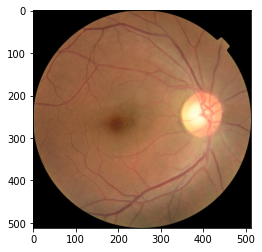

prétraitement


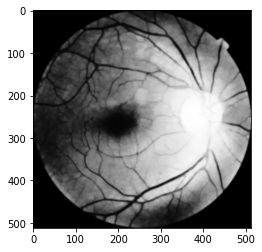

résultat de seuillage


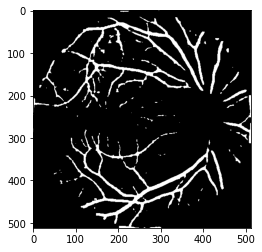

résultat finale


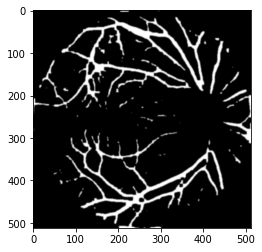

True

In [6]:
    # application de l'algorithme sur une seulle image
    
    images_path ='/home/chakour/Bureau/Code Mehdi/reseau_vasculaire/12484_right.jpeg'
    image =  cv.imread(images_path) # lire l'image couleur
    image =  cv.cvtColor(image,cv.COLOR_BGR2RGB)
    print("image couleur de la rétine")
    plt.imshow(image)
    plt.show()
    ######################### 1 - Segmentation de l'Arbre vasculaire ##################################
    
    #augmentation de contrast
    blue, green, red = cv.split(image)
    equalized=cv.equalizeHist(green)
    #Filtrage
    kernal = np.ones((5,5), np.uint8) #creation d'une matrice 5*5 
    opening = cv.morphologyEx(equalized, cv.MORPH_OPEN, kernal)
    gblur = cv.GaussianBlur(opening,(5, 5), 0)     # filtre de gausse appliquer sur canal vert amélioré
    gblur = cv.cvtColor(gblur, cv.COLOR_BGR2RGB)   # convert the result to RGB
    print("prétraitement")
    plt.imshow(gblur)
    plt.show()
    ################ Extraction du réseau vasculaire (chapeau haut de forme TOPHAT) ########################
    # Getting the kernel to be used in Top-Hat 
    filterSize =(11,11) # définir la taille du filtre 
    kernal2 = cv.getStructuringElement(cv.MORPH_RECT,filterSize) # element structurant est un rectangle
    th = cv.morphologyEx(gblur, cv.MORPH_BLACKHAT, kernal2) #appliquer TOPHAT noir
    _, mask = cv.threshold(th,20, 255, cv.THRESH_BINARY) #application d'un seuillage de base avec 
                                                         #une seuille S=20 et valeur max=255
    mask = cv.cvtColor(mask, cv.COLOR_BGR2RGB)
    print("résultat de seuillage")
    plt.imshow(mask)
    plt.show()
    ################## extraction de ligne centrale (ligne de partage des eaux watershed)####################
    kernel  = np.ones((3,3),np.uint8) # definir le noyeau
    closing = cv.morphologyEx(mask,cv.MORPH_CLOSE,kernel, iterations = 3) # fermeture morphologique
    gblur2 = cv.GaussianBlur(closing,(5, 5),0) # application d'un filtre gaussien suivant l'axe Y (vertical)
                                                        # une valeur de seuil S=25 et valeur max=255   
    result = cv.cvtColor(gblur2, cv.COLOR_BGR2RGB)
    print("résultat finale")
    plt.imshow(result)
    plt.show()
    filename = 'reseau vasculaire.jpeg'
    cv.imwrite(filename, result) 